# MLS approximation in 2d

(102, 6)


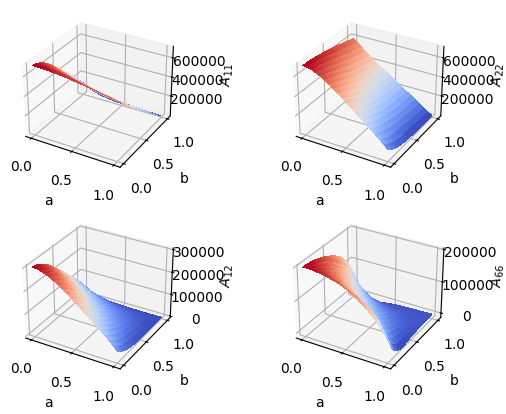

In [1]:
import numpy as np

from sigmaepsilon.math.approx import moving_least_squares, CubicWeightFunction
from sigmaepsilon.math.downloads import download_mls_testdata

data = download_mls_testdata()

print(data.shape)

w = CubicWeightFunction([0.0, 0.0], [0.5, 0.5])
approx = moving_least_squares(data[:, 0:2], data[:, 2:], deg=2, order=1, w=w)

n = 20  # number of sampling points per coordinate
X = np.linspace(0, 1, n)
Y = np.linspace(0, 1, n)
X, Y = np.meshgrid(X, Y)
Z = np.zeros([4, n, n])
for i in range(n):
    for j in range(n):
        f, *_ = approx([X[i, j], Y[i, j]])
        Z[:, i, j] = f

# %%
from matplotlib import pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax1 = fig.add_subplot(221, projection="3d")
ax2 = fig.add_subplot(222, projection="3d")
ax3 = fig.add_subplot(223, projection="3d")
ax4 = fig.add_subplot(224, projection="3d")

ax1.plot_surface(X, Y, Z[0, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.plot_surface(X, Y, Z[1, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax3.plot_surface(X, Y, Z[2, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax4.plot_surface(X, Y, Z[3, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel("a")
ax1.set_ylabel("b")
ax1.set_zlabel("$A_{11}$")
ax2.set_xlabel("a")
ax2.set_ylabel("b")
ax2.set_zlabel("$A_{22}$")
ax3.set_xlabel("a")
ax3.set_ylabel("b")
ax3.set_zlabel("$A_{12}$")
ax4.set_xlabel("a")
ax4.set_ylabel("b")
ax4.set_zlabel("$A_{66}$")
plt.show()